## AE Convolucionales

El AE Convolucional es simplemente otra variante del Stacked AE, solo que esta vez podemos usar capas convolucionales. Vamos a aplicarlo al Fashion MNIST.

In [1]:
# Cargar datos

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# cargar datos
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

### Arquitectura AE-Convolucional

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

# funcion de exactitud binaria
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

# encoder
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])

# decoder
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

# autoencoder
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])


# compilar y entrenar
conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 32s 19ms/step - loss: 0.3018 - rounded_accuracy: 0.9187 - val_loss: 0.2843 - val_rounded_accuracy: 0.9298
Epoch 2/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.2756 - rounded_accuracy: 0.9413 - val_loss: 0.2729 - val_rounded_accuracy: 0.9456
Epoch 3/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.2708 - rounded_accuracy: 0.9462 - val_loss: 0.2695 - val_rounded_accuracy: 0.9497
Epoch 4/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.2682 - rounded_accuracy: 0.9491 - val_loss: 0.2685 - val_rounded_accuracy: 0.9493
Epoch 5/5
1719/1719 [==============================] - 25s 14ms/step - loss: 0.2664 - rounded_accuracy: 0.9510 - val_loss: 0.2670 - val_rounded_accuracy: 0.9511


### Visualizar Imaganes Generadas

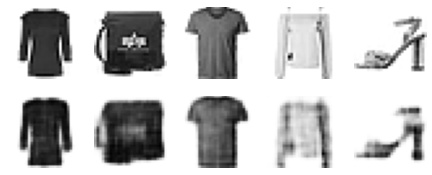

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def show_reconstructions(model, images=X_valid, n_images=5):
    # prediccion de n cantidad de imagenes
    reconstructions = model.predict(images[:n_images])
    # impresion de imagenes vs las generadas
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
        

show_reconstructions(conv_ae)